In [ ]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('/content/vegetation_health_data.csv')

In [ ]:
df.head(10)

,Temperature,Humidity,Pressure,Light_Intensity,Distance,Angle,Acceleration,Vegetation_Health
0,21.236204,42.959305,976.170568,67.270299,57.627592,35.427197,6.482570,0
1,38.521429,67.933066,974.697880,79.668140,80.737801,42.609209,1.723864,0
2,31.959818,91.106209,1040.625458,25.046790,76.255932,76.909265,8.723946,0
3,27.959755,81.255742,974.954620,62.487410,16.236091,30.600395,6.131162,1
4,14.680559,86.459280,977.194973,57.174598,15.775698,78.268472,1.572039,0
5,14.679836,76.114836,1025.939826,83.283038,27.549262,7.932099,9.623381,0
6,11.742508,78.459360,994.973984,90.608706,36.746398,69.911859,5.183655,0
7,35.985284,89.443696,1027.671056,1.215677,41.437103,76.279287,0.728985,0
8,28.033450,47.476761,956.536616,67.401992,68.290024,16.363589,6.268329,0
9,31.242177,64.259747,998.757119,5.183580,6.611363,38.731188,2.531989,0


In [ ]:
df['Vegetation_Health'].count().sum()

1000

In [ ]:
df.describe()

,Temperature,Humidity,Pressure,Light_Intensity,Distance,Angle,Acceleration,Vegetation_Health
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.707697,65.491211,1000.240573,49.037505,49.916427,44.861804,4.933088,0.327000
std,8.764121,20.453293,29.067420,28.648934,28.394184,26.027533,2.897336,0.469352
min,10.138961,30.225278,950.001163,0.065339,1.003041,0.556544,0.014283,0.000000
25%,17.079198,46.875199,976.135098,24.190077,25.252427,22.444200,2.402217,0.000000
50%,24.904221,66.311373,1000.061392,48.427928,49.965212,44.136253,4.846430,0.000000
75%,32.329588,83.232554,1025.910353,73.754081,74.259352,66.586660,7.564643,1.000000
max,39.991530,99.958961,1049.782086,99.955770,99.777190,89.941527,9.994607,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        1000 non-null   float64
 1   Humidity           1000 non-null   float64
 2   Pressure           1000 non-null   float64
 3   Light_Intensity    1000 non-null   float64
 4   Distance           1000 non-null   float64
 5   Angle              1000 non-null   float64
 6   Acceleration       1000 non-null   float64
 7   Vegetation_Health  1000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


In [ ]:
df.columns

Index(['Temperature', 'Humidity', 'Pressure', 'Light_Intensity', 'Distance',
       'Angle', 'Acceleration', 'Vegetation_Health'],
      dtype='object')

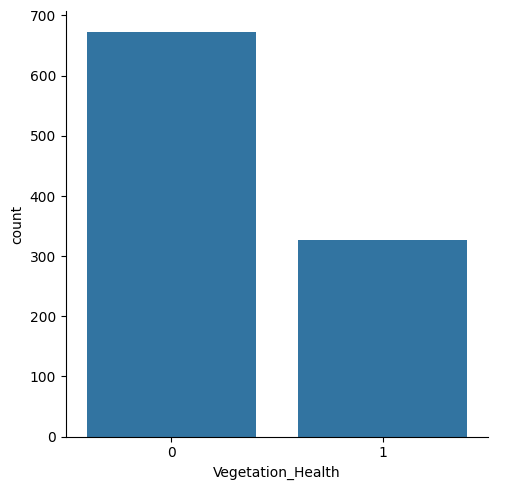

In [ ]:
sns.catplot(x='Vegetation_Health', data=df, kind='count')

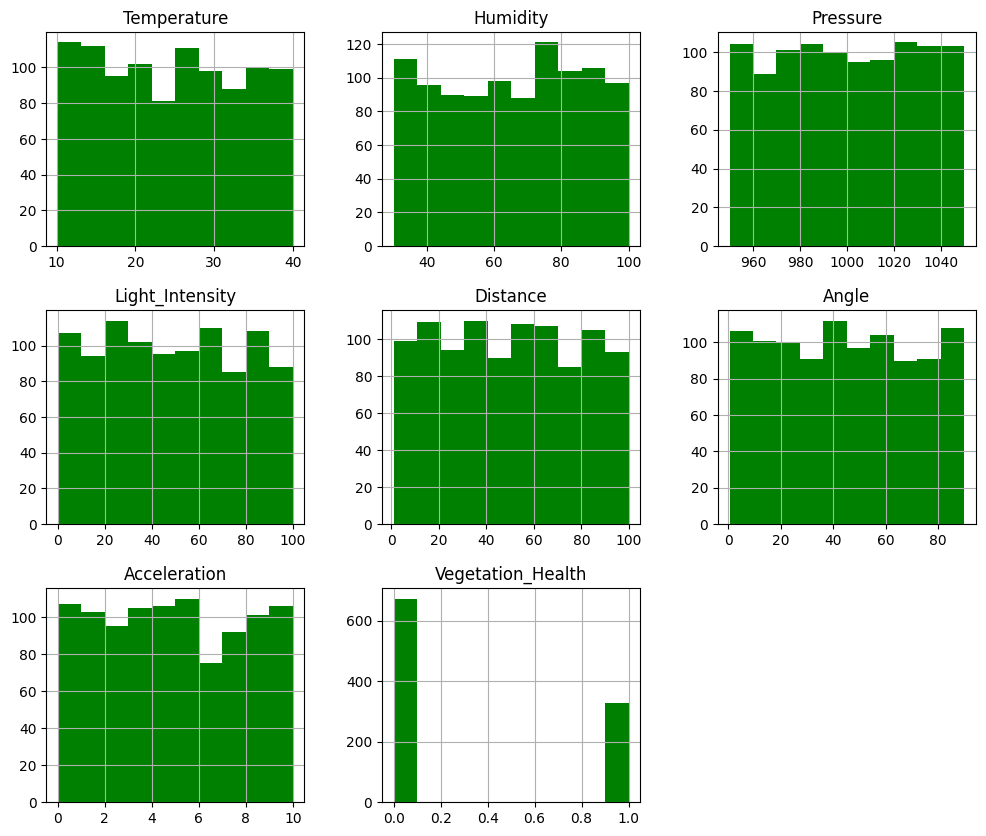

In [ ]:
df.hist(figsize=(12,10), color='green')
plt.show()

In [ ]:
corr = df.corr()

<Axes: >

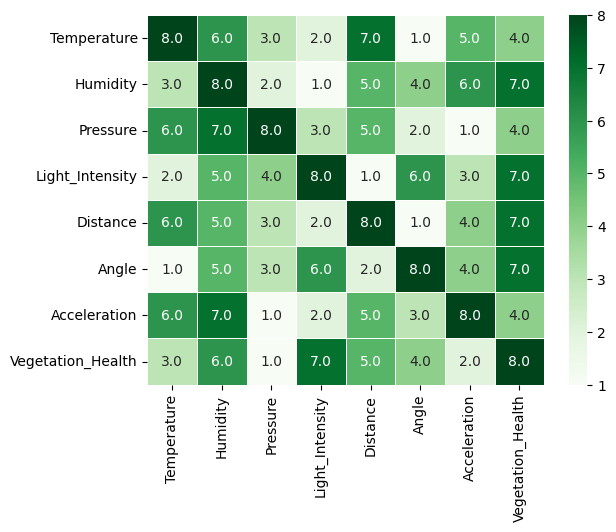

In [ ]:
sns.heatmap(corr.rank(axis='columns'), annot=True,fmt='.1f',linewidth=.5, cmap="Greens")

In [ ]:
X = df.drop('Vegetation_Health', axis=1)
y = df['Vegetation_Health']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
Algorithm = ['RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifier','LogisticRegression','Naive Bayes','XGBoost']
Accuracy=[]

In [ ]:
def algorithm(model):
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)

  accuracy = accuracy_score(y_test,prediction)

  print('confusion matrix')
  cm = confusion_matrix(y_test,prediction)


  group_names = ["True Negative","False Positive",'False Negative',"True Positive"]
  group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

  plt.title("Confusion Matrix")
  plt.xlabel('predicted label')
  plt.ylabel('True label')
  plt.show()


  print('Normalized confusion matrix')
  cm1 = confusion_matrix(y_test,prediction, normalize='true')

  group_names = ["True Negative","False Positive",'False Negative',"True Positive"]
  group_counts = ['{0:0.0f}'.format(value) for value in cm1.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cm1.flatten()/np.sum(cm1)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

  plt.title("Confusion Matrix")
  plt.xlabel('predicted label')
  plt.ylabel('True label')
  plt.show()

  print(cm)
  print(classification_report(y_test,prediction))
  final_score = accuracy*100
  print('accuracy_score : ' , final_score)

  Accuracy.append(accuracy*100)

confusion matrix


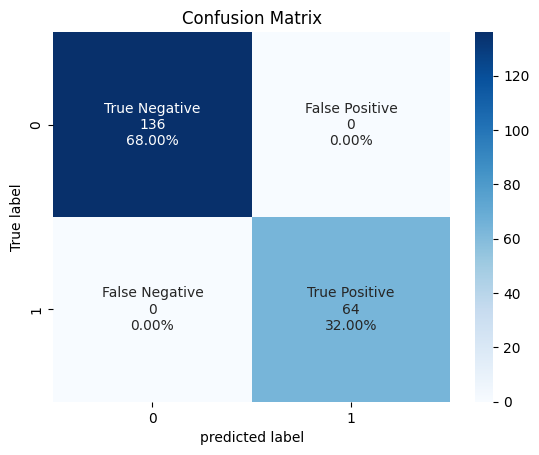

Normalized confusion matrix


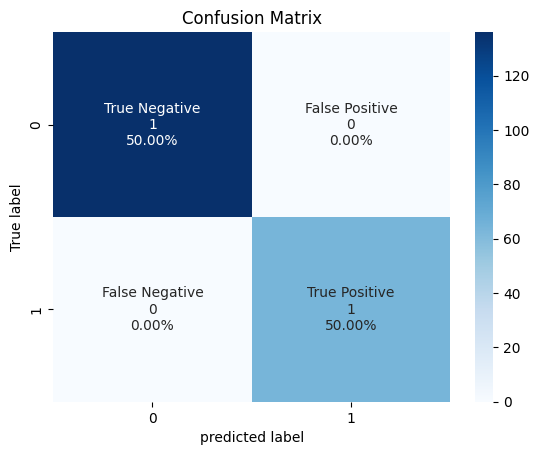

[[136   0]
 [  0  64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00        64

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

accuracy_score :  100.0


In [ ]:
model_1 = RandomForestClassifier(n_estimators=100)
algorithm(model_1)

confusion matrix


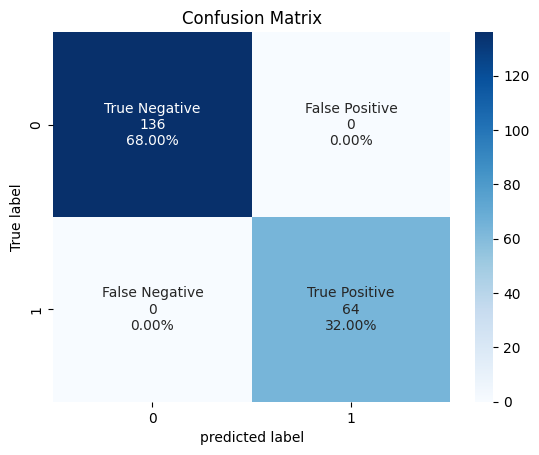

Normalized confusion matrix


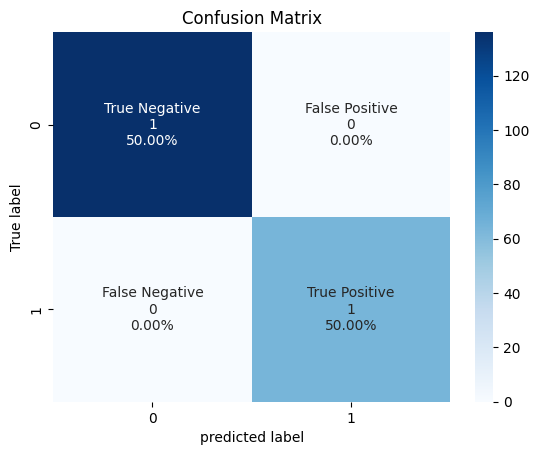

[[136   0]
 [  0  64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00        64

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

accuracy_score :  100.0


In [ ]:
model_2 = DecisionTreeClassifier(random_state=42)
algorithm(model_2)

confusion matrix


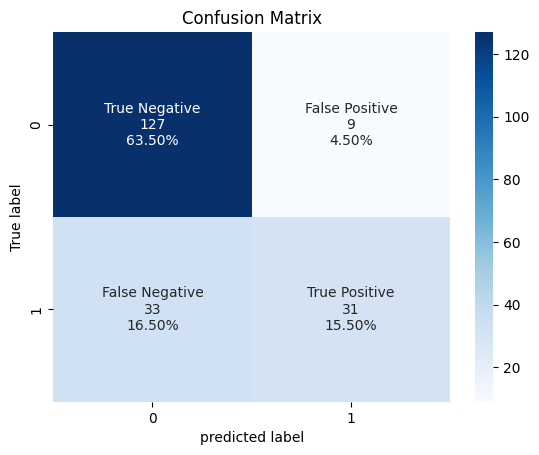

Normalized confusion matrix


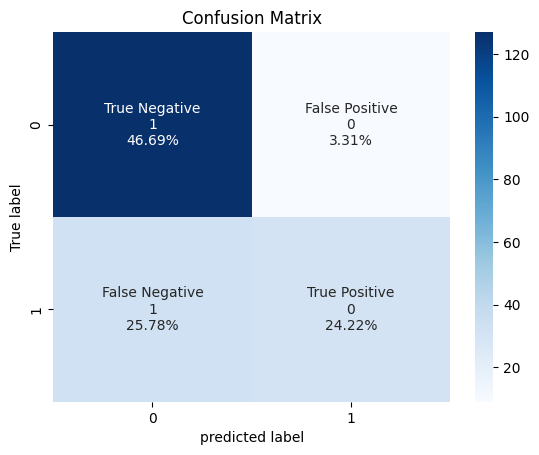

[[127   9]
 [ 33  31]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       136
           1       0.78      0.48      0.60        64

    accuracy                           0.79       200
   macro avg       0.78      0.71      0.73       200
weighted avg       0.79      0.79      0.77       200

accuracy_score :  79.0


In [ ]:
model_3 = KNeighborsClassifier(n_neighbors=2)
algorithm(model_3)

confusion matrix


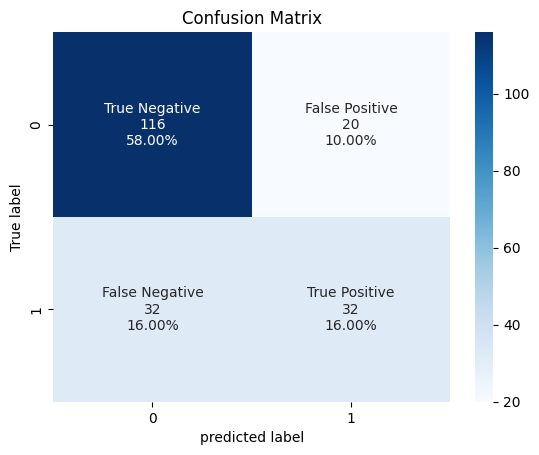

Normalized confusion matrix


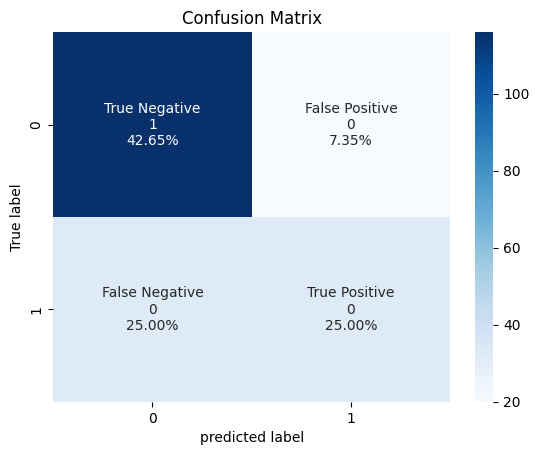

[[116  20]
 [ 32  32]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       136
           1       0.62      0.50      0.55        64

    accuracy                           0.74       200
   macro avg       0.70      0.68      0.68       200
weighted avg       0.73      0.74      0.73       200

accuracy_score :  74.0


In [ ]:
model_4 = LogisticRegression()
algorithm(model_4)

confusion matrix


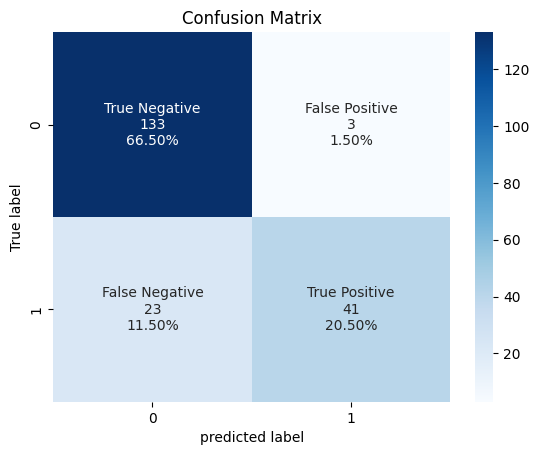

Normalized confusion matrix


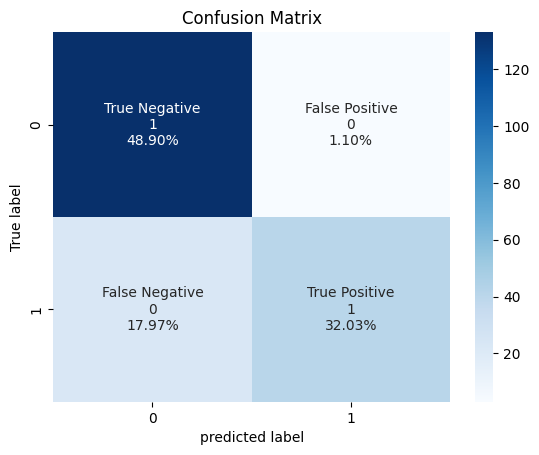

[[133   3]
 [ 23  41]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       136
           1       0.93      0.64      0.76        64

    accuracy                           0.87       200
   macro avg       0.89      0.81      0.84       200
weighted avg       0.88      0.87      0.86       200

accuracy_score :  87.0


In [ ]:
model_5 = GaussianNB()
algorithm(model_5)

confusion matrix


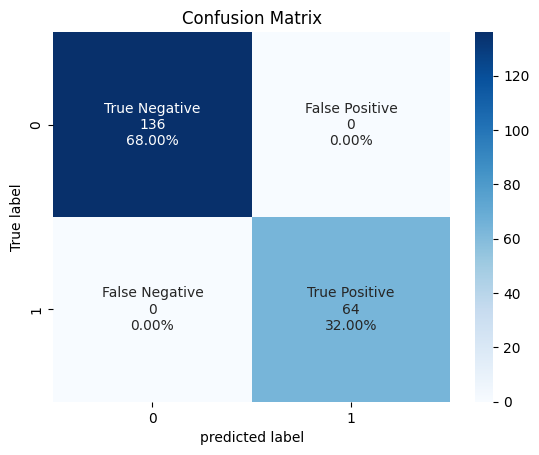

Normalized confusion matrix


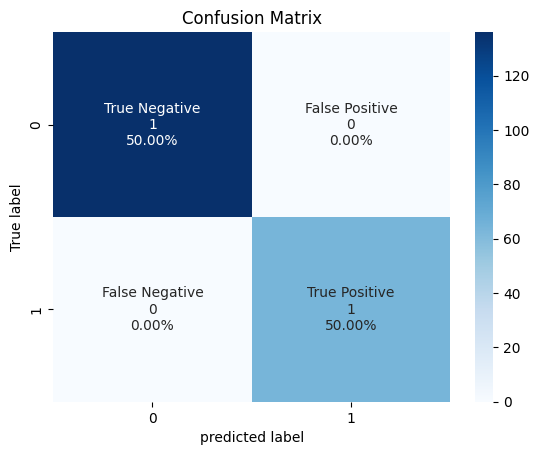

[[136   0]
 [  0  64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00        64

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

accuracy_score :  100.0


In [ ]:
model_6 = xgb.XGBClassifier()
algorithm(model_6)

In [ ]:
score = pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy })
score

,Algorithm,Accuracy
0,RandomForestClassifier,100.0
1,DecisionTreeClassifier,100.0
2,KNeighborsClassifier,79.0
3,LogisticRegression,74.0
4,Naive Bayes,87.0
5,XGBoost,100.0


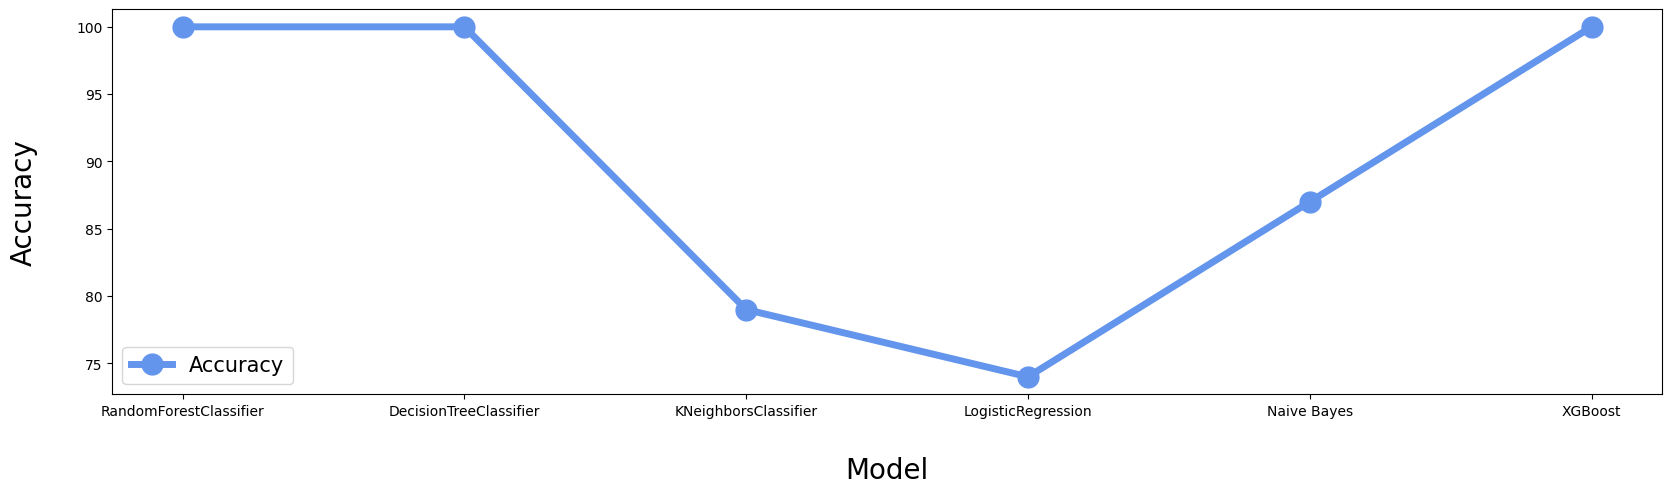

In [ ]:
fig = plt.figure(figsize=(20,5))
plt.plot(score.Algorithm,score.Accuracy,label='Accuracy',lw=5,color='CornflowerBlue',marker='o',markersize = 15)
plt.legend(fontsize=15)
plt.xlabel('\nModel',fontsize= 20)
plt.ylabel('Accuracy\n',fontsize= 20)
plt.show()

In [ ]:
test_input = [[42, 25, 1000, 20, 50, 45, 5]]

In [ ]:
health_prediction = model_1.predict(test_input)

In [ ]:
health_prediction

array([0])

In [ ]:
test_input = [[30, 65, 1015, 50, 25, 20, 2]]

In [ ]:
health_prediction = model_1.predict(test_input)

In [ ]:
health_prediction

array([1])

In [ ]:
import pickle

In [ ]:
with open('vegetation_health_model.pkl', 'wb') as file:
    pickle.dump(model_1, file)